In [309]:
import os
import numpy as np
from PIL import Image


In [311]:
train_path = 'C:\\Users\\fabio\\Desktop\\ML\\machine-learning-and-data-mining-csc735\\3rd-homework\\Animals_DataSet\\Training_Set'
validation_path = 'C:\\Users\\fabio\\Desktop\\ML\\machine-learning-and-data-mining-csc735\\3rd-homework\\Animals_DataSet\\Validation_Set'
test_path = 'C:\\Users\\fabio\\Desktop\\ML\\machine-learning-and-data-mining-csc735\\3rd-homework\\Animals_DataSet\\Test_Set'


In [313]:
def load_image(img_path):
    try:
        img = Image.open(img_path)  # Open the image
        img = img.convert('RGB')  # Ensure image is in RGB mode
        img = img.resize((224, 224))  # Resize to (224, 224)
        img_array = np.array(img)  # Convert to numpy array
        return img_array
    except Exception as e:
        print(f"Could not load image {img_path}: {e}")
        return None

def load_images_from_folder_with_labels(folder):
    images = []
    labels = []
    for label, subfolder in enumerate(os.listdir(folder)):
        subfolder_path = os.path.join(folder, subfolder)
        if not os.path.isdir(subfolder_path) or subfolder.startswith('.'):
            continue
        for filename in os.listdir(subfolder_path):
            if filename.startswith('.'):
                continue
            img_path = os.path.join(subfolder_path, filename)
            if img_path.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
                img_array = load_image(img_path)
                if img_array is not None:
                    images.append(img_array)
                    labels.append(label)

    return np.array(images), np.array(labels)

# Load images from training, validation, and test sets
train_images, train_labels = load_images_from_folder_with_labels(train_path)
validation_images, validation_labels = load_images_from_folder_with_labels(validation_path)
test_images, test_labels = load_images_from_folder_with_labels(test_path)

# Print shapes of images
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Validation images shape:", validation_images.shape)
print("Validation labels shape:", validation_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


Train images shape: (4200, 224, 224, 3)
Train labels shape: (4200,)
Validation images shape: (1200, 224, 224, 3)
Validation labels shape: (1200,)
Test images shape: (600, 224, 224, 3)
Test labels shape: (600,)


In [319]:
import numpy as np
from keras.utils import to_categorical

# Check for unique labels before adjusting
print("Unique labels in train_labels before adjustment:", np.unique(train_labels))
print("Unique labels in validation_labels before adjustment:", np.unique(validation_labels))

# Subtract 1 from all labels to shift the range to [0, 5]
train_labels = train_labels - 1
validation_labels = validation_labels - 1

# Now check if the labels are in the valid range [0, 5]
print("Unique labels in train_labels after adjustment:", np.unique(train_labels))
print("Unique labels in validation_labels after adjustment:", np.unique(validation_labels))

# Apply one-hot encoding to the adjusted labels
train_labels = to_categorical(train_labels, num_classes=6)
validation_labels = to_categorical(validation_labels, num_classes=6)

# Check the shapes of the one-hot encoded labels
print("Train labels shape after one-hot encoding:", train_labels.shape)
print("Validation labels shape after one-hot encoding:", validation_labels.shape)

# Check the unique values in the one-hot encoded labels by checking the unique rows
unique_train_labels = np.unique(train_labels, axis=0)
unique_validation_labels = np.unique(validation_labels, axis=0)

print("Unique labels in train_labels after one-hot encoding:", unique_train_labels)
print("Unique labels in validation_labels after one-hot encoding:", unique_validation_labels)


Unique labels in train_labels before adjustment: [1 2 3 4 5 6]
Unique labels in validation_labels before adjustment: [1 2 3 4 5 6]
Unique labels in train_labels after adjustment: [0 1 2 3 4 5]
Unique labels in validation_labels after adjustment: [0 1 2 3 4 5]
Train labels shape after one-hot encoding: (4200, 6)
Validation labels shape after one-hot encoding: (1200, 6)
Unique labels in train_labels after one-hot encoding: [[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
Unique labels in validation_labels after one-hot encoding: [[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


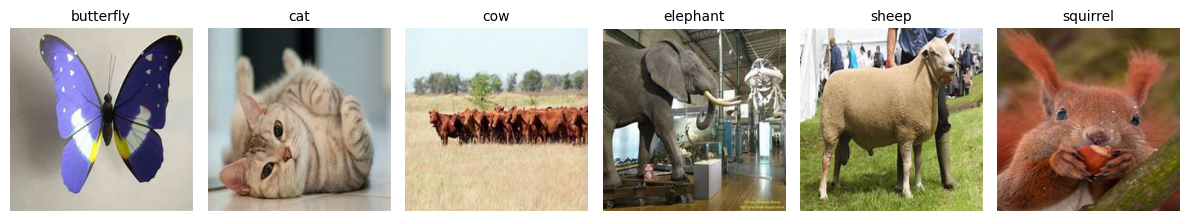

In [325]:
import matplotlib.pyplot as plt  # Ensure matplotlib is imported
import numpy as np  # Ensure NumPy is imported

def show_one_image_per_class(images, labels, num_classes, class_names):
    # Dictionary to store one image per class
    class_images = {}

    # Loop over images and labels
    for img, label in zip(images, labels):
        # Extract the label index from the one-hot encoded label
        label_index = np.argmax(label)  # Get the index of the '1' in the one-hot encoding

        # Add the first image for each class
        if label_index not in class_images:
            class_images[label_index] = img
        if len(class_images) == num_classes:
            break

    # Display images
    plt.figure(figsize=(12, 6))
    for i, class_label in enumerate(sorted(class_images.keys())):
        plt.subplot(1, num_classes, i + 1)  # Use `i + 1` for the subplot index
        plt.imshow(class_images[class_label])
        plt.title(class_names[class_label], fontsize=10)  # Use label directly for class_names
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Assuming 6 classes in your dataset with these names
class_names = ["butterfly", "cat", "cow", "elephant", "sheep", "squirrel"]

# Show one image for each class in the training set
NUM_CLASSES = 6
show_one_image_per_class(train_images, train_labels, NUM_CLASSES, class_names)


In [244]:
from sklearn.preprocessing import StandardScaler

In [327]:
def normalize_images(images):
    return images / 255.0  # Normalize pixel values to [0, 1]

In [329]:
train_images_normalized = normalize_images(train_images)
validation_images_normalized = normalize_images(validation_images)
test_images_normalized = normalize_images(test_images)

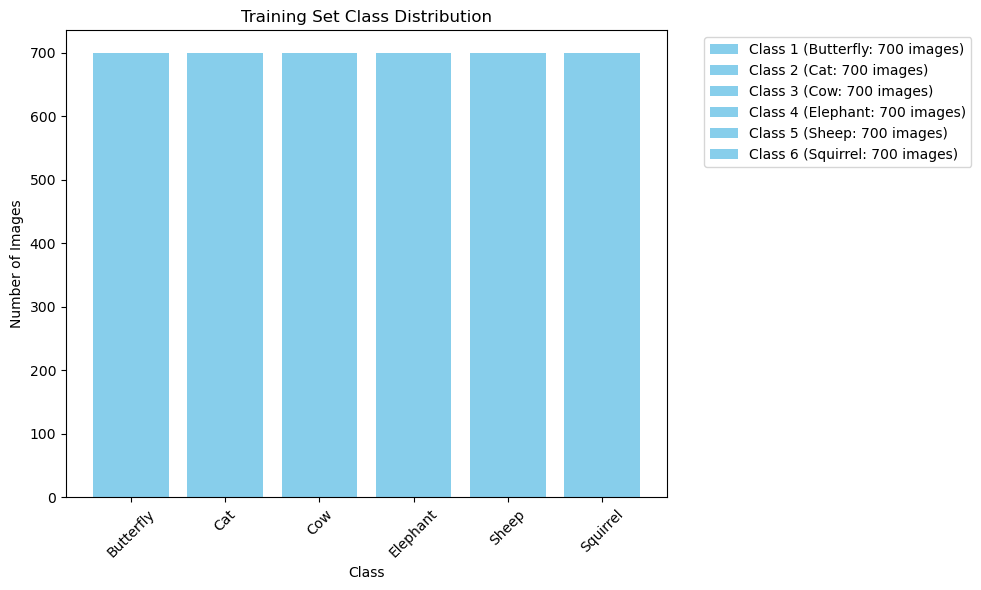

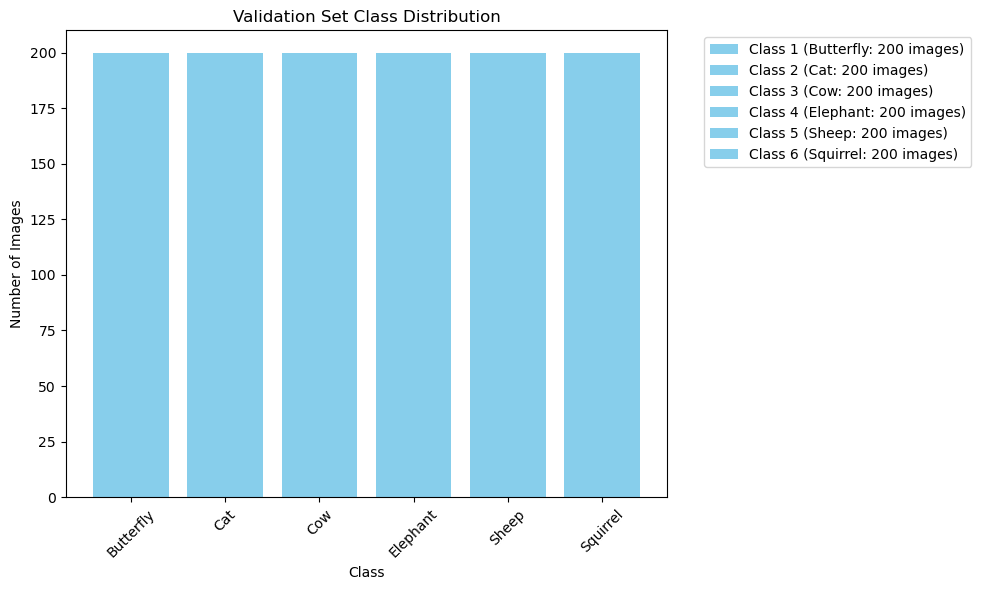

In [333]:
import matplotlib.pyplot as plt

# Class names for the dataset
class_names = ['Butterfly', 'Cat', 'Cow', 'Elephant', 'Sheep', 'Squirrel']

# Class counts for training set
train_class_counts = [700, 700, 700, 700, 700, 700]

# Class counts for validation set
validation_class_counts = [200, 200, 200, 200, 200, 200]

def plot_class_distribution(class_names, class_counts, dataset_name):
    """
    Plot the class distribution as a bar chart with custom legend.
    """
    plt.figure(figsize=(10, 6))
    bars = plt.bar(class_names, class_counts, color='skyblue')
    plt.title(f'{dataset_name} Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45)
    
    # Create custom legend with class names and counts
    legend_labels = [f"Class {i+1} ({class_names[i]}: {class_counts[i]} images)" for i in range(len(class_names))]
    plt.legend(bars, legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

# Plot the class distribution for the training set
plot_class_distribution(class_names, train_class_counts, 'Training Set')

# Plot the class distribution for the validation set
plot_class_distribution(class_names, validation_class_counts, 'Validation Set')


In [339]:
print(train_images.shape)
print(train_labels.shape)  # Should be (4200, 6)
print(validation_labels.shape)  # Should be (1200, 6)


(4200, 224, 224, 3)
(4200, 6)
(1200, 6)


In [341]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Define the CNN model
model = models.Sequential()

# Add the first convolutional layer (32 filters, 3x3 filter size)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.BatchNormalization())  # Add batch normalization
model.add(layers.MaxPooling2D((2, 2)))  # Pooling layer after first convolution

# Add the second convolutional layer (64 filters, 3x3 filter size)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())  # Add batch normalization
model.add(layers.MaxPooling2D((2, 2)))  # Pooling layer after second convolution

# Add the third convolutional layer (128 filters, 3x3 filter size)
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())  # Add batch normalization
model.add(layers.MaxPooling2D((2, 2)))  # Pooling layer after third convolution

# Add the fourth convolutional layer (256 filters, 3x3 filter size)
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())  # Add batch normalization
model.add(layers.MaxPooling2D((2, 2)))  # Pooling layer after fourth convolution

# Add a flattening layer to connect to dense layers
model.add(layers.Flatten())

# Add a fully connected (dense) layer
model.add(layers.Dense(128, activation='relu'))

# Add the output layer (with 6 classes)
model.add(layers.Dense(6, activation='softmax'))  # 6 classes for classification

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary to check the architecture
model.summary()


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_72 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_72          │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_72 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_73 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_73          │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_73 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_74 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_74          │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_74 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_75 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_75          │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_75 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 128)            │     4,718,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,109,830 (19.49 MB)

 Trainable params: 5,108,870 (19.49 MB)

 Non-trainable params: 960 (3.75 KB)

In [343]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [345]:
history = model.fit(
    train_images, train_labels,
    epochs=15,  # Number of epochs, adjust as needed
    batch_size=32,
    validation_data=(validation_images, validation_labels),
    shuffle=True  # Shuffling the data for each epoch
)


Epoch 1/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 314s 2s/step - accuracy: 0.3797 - loss: 4.8445 - val_accuracy: 0.3758 - val_loss: 1.9420
Epoch 2/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 290s 2s/step - accuracy: 0.5627 - loss: 1.2707 - val_accuracy: 0.5025 - val_loss: 1.5993
Epoch 3/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 296s 2s/step - accuracy: 0.6211 - loss: 1.0743 - val_accuracy: 0.5058 - val_loss: 1.8762
Epoch 4/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 297s 2s/step - accuracy: 0.6787 - loss: 0.8603 - val_accuracy: 0.5558 - val_loss: 1.3312
Epoch 5/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 294s 2s/step - accuracy: 0.7288 - loss: 0.7312 - val_accuracy: 0.5742 - val_loss: 1.3705
Epoch 6/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - accuracy: 0.7831 - loss: 0.5871 - val_accuracy: 0.5792 - val_loss: 1.3873
Epoch 7/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 324s 2s/step - accuracy: 0.8234 - loss: 0.5053 - val_accuracy: 0.5817 - val_loss: 1.5275
Epoch 8/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 305s 2s/step - accuracy: 0.8675 - loss: 0.3808 - val_accu

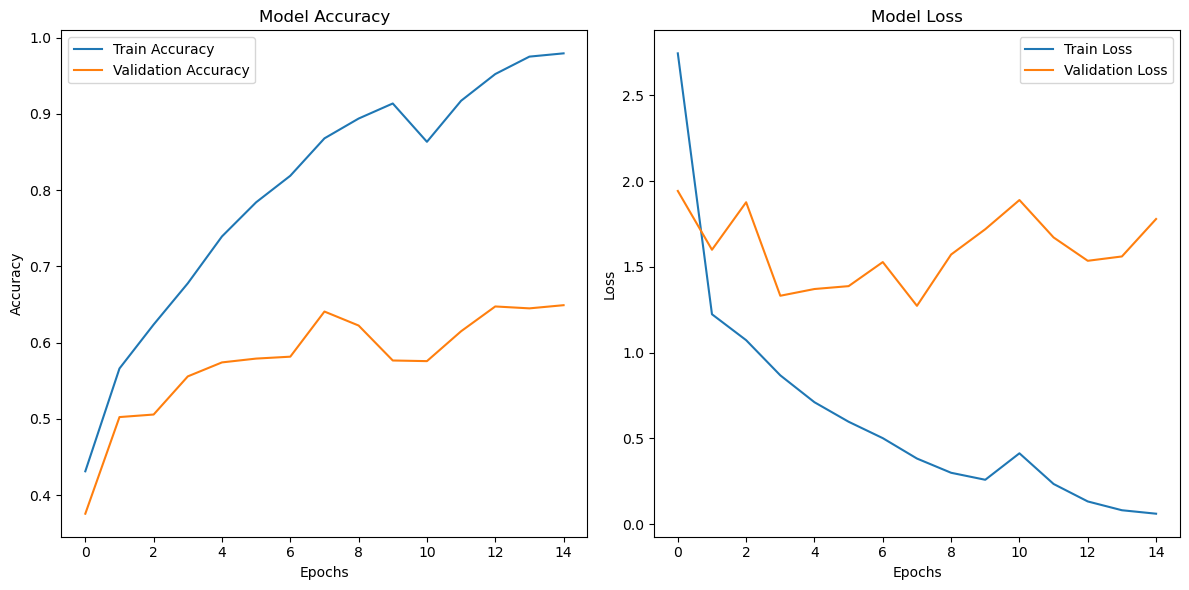

In [347]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [279]:
# Ensure the one-hot encoding has been applied
train_generator = datagen.flow(
    train_images, 
    train_labels,  # One-hot encoded labels
    batch_size=32,
    shuffle=True
)

val_generator = datagen.flow(
    validation_images, 
    validation_labels,  # One-hot encoded labels
    batch_size=32,
    shuffle=False
)


Epoch 1/10


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

In [283]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

# Create the model
model_1 = Sequential()

# First Convolutional Block
model_1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model_1.add(Conv2D(64, (3, 3), activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Block
model_1.add(Conv2D(128, (3, 3), activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth Convolutional Block
model_1.add(Conv2D(256, (3, 3), activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Dense Layers
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.5))  # Dropout to prevent overfitting

# Output layer
model_1.add(Dense(6, activation='softmax'))  # 6 classes for classification

# Compile the model
model_1.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model_1.summary()

# Train the model with shuffling enabled
history_1 = model_1.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    batch_size=32,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator),
    shuffle=True
)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_68 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_68          │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_68 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_69 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_69          │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_69 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_70 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_70          │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_70 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_71 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_71          │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_71 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 128)            │     4,718,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,109,830 (19.49 MB)

 Trainable params: 5,108,870 (19.49 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/10
 36/132 ━━━━━━━━━━━━━━━━━━━━ 3:08 2s/step - accuracy: 0.2953 - loss: -2973.8071

KeyboardInterrupt: 

In [127]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

# Assuming your images and labels are already loaded and split into train, validation, and test sets:
# Ensure labels are correctly shaped: convert them to categorical (one-hot encoding)
train_labels = to_categorical(train_labels, num_classes=6)  # Shape should be (num_samples, 6)
validation_labels = to_categorical(validation_labels, num_classes=6)  # Shape should be (num_samples, 6)
test_labels = to_categorical(test_labels, num_classes=6)  # Shape should be (num_samples, 6)

# Now, check the shapes of the labels
print(train_labels.shape)  # Should print (num_samples, 6)
print(validation_labels.shape)  # Should print (num_samples, 6)
print(test_labels.shape)  # Should print (num_samples, 6)

# Define data generators
train_generator = ImageDataGenerator(rescale=1./255).flow(train_images, train_labels, batch_size=32)
validation_generator = ImageDataGenerator(rescale=1./255).flow(validation_images, validation_labels, batch_size=32)

# Build the Sequential model (model1)
model1 = Sequential()

# Convolutional Layer 1
model1.add(Conv2D(32, (3, 3), activation='leaky_relu', input_shape=(224, 224, 3)))  # 32 filters, kernel size (3,3)
model1.add(MaxPooling2D(pool_size=(2, 2)))  # Max pooling layer
model1.add(BatchNormalization())

# Convolutional Layer 2
model1.add(Conv2D(64, (3, 3), activation='leaky_relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(BatchNormalization())

# Convolutional Layer 3
model1.add(Conv2D(128, (3, 3), activation='leaky_relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(BatchNormalization())

# Convolutional Layer 4
model1.add(Conv2D(256, (3, 3), activation='leaky_relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(BatchNormalization())

# Flatten the feature map into a vector
model1.add(Flatten())

# Fully connected layer
model1.add(Dense(512, activation='leaky_relu'))  # Increased the size of the dense layer
model1.add(Dropout(0.4))  # Dropout layer to reduce overfitting

# Output layer
model1.add(Dense(6, activation='softmax'))  # 6 classes (output layer)

# Compile the model with SGD optimizer
model1.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model1.keras', monitor='val_accuracy', save_best_only=True, verbose=1)

# Summary of the model
model1.summary()

# Train the model using the pre-split datasets
history1 = model1.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[lr_scheduler, early_stopping, checkpoint]
)


(4200, 6, 6, 6, 6, 6, 6, 6)
(1200, 6, 6, 6, 6, 6, 6, 6)
(600, 6, 6, 6, 6, 6, 6, 6)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 54, 54, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 26, 26, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │    18,874,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,268,294 (73.50 MB)

 Trainable params: 19,267,334 (73.50 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/20


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 6, 6, 6, 6, 6, 6, 6), output.shape=(None, 6)

In [ ]:
#Model 1:

#Activation: ReLU
#Optimizer: Adam
#Dropout: 0.5
#Learning Rate: 0.0001
#Batch Size: 32
#Model 1 uses a conventional architecture with ReLU and Adam, making it a baseline model that fits the assignment's first choice for activation and optimizer.

#Model 2:

#Activation: Leaky ReLU
#Optimizer: SGD with momentum
#Dropout: 0.4
#Learning Rate: 0.01
#Batch Size: 32
#Model 2 experiments with a different activation function (Leaky ReLU) and a more traditional optimizer (SGD with momentum).

#Model 3:

#Activation: ELU
#Optimizer: RMSprop
#Dropout: 0.6
#Learning Rate: 0.001
#Batch Size: 32
#Model 3 uses ELU, an alternative activation function that can offer better performance over ReLU in some cases, and RMSprop, which adapts the learning rate during training.

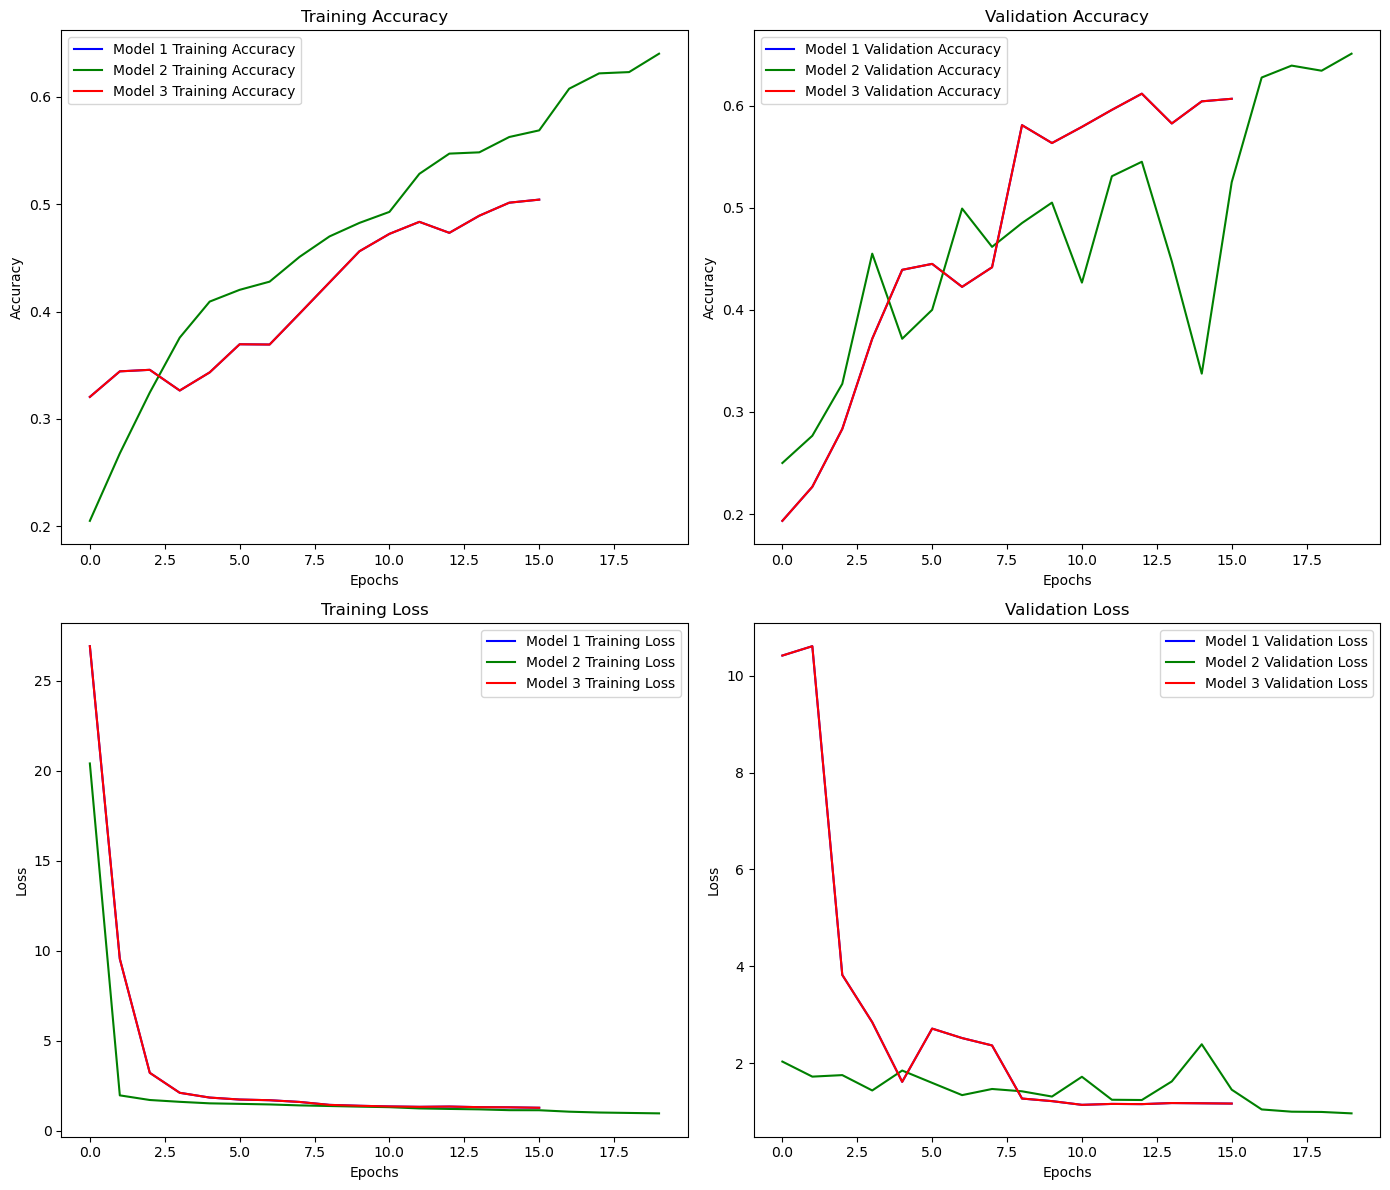

In [285]:
import matplotlib.pyplot as plt

# Create a figure and set of subplots (2 rows and 2 columns)
plt.figure(figsize=(14, 12))

# Plot Training Accuracy
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Model 1 Training Accuracy', color='blue')
plt.plot(history2.history['accuracy'], label='Model 2 Training Accuracy', color='green')
plt.plot(history3.history['accuracy'], label='Model 3 Training Accuracy', color='red')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Validation Accuracy
plt.subplot(2, 2, 2)
plt.plot(history.history['val_accuracy'], label='Model 1 Validation Accuracy', color='blue')
plt.plot(history2.history['val_accuracy'], label='Model 2 Validation Accuracy', color='green')
plt.plot(history3.history['val_accuracy'], label='Model 3 Validation Accuracy', color='red')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training Loss
plt.subplot(2, 2, 3)
plt.plot(history.history['loss'], label='Model 1 Training Loss', color='blue')
plt.plot(history2.history['loss'], label='Model 2 Training Loss', color='green')
plt.plot(history3.history['loss'], label='Model 3 Training Loss', color='red')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Validation Loss
plt.subplot(2, 2, 4)
plt.plot(history.history['val_loss'], label='Model 1 Validation Loss', color='blue')
plt.plot(history2.history['val_loss'], label='Model 2 Validation Loss', color='green')
plt.plot(history3.history['val_loss'], label='Model 3 Validation Loss', color='red')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [353]:
# Check if the training history values are not empty
print("Model 1 training accuracy:", history.history['accuracy'])
print("Model 1 validation accuracy:", history.history['val_accuracy'])
print("Model 1 training loss:", history.history['loss'])
print("Model 1 validation loss:", history.history['val_loss'])


Model 1 training accuracy: [0.3204762041568756, 0.3442857265472412, 0.345714271068573, 0.3264285624027252, 0.34333333373069763, 0.369523823261261, 0.3692857027053833, 0.3980952501296997, 0.427142858505249, 0.45619046688079834, 0.47238096594810486, 0.48357143998146057, 0.47333332896232605, 0.4892857074737549, 0.5014285445213318, 0.5042856931686401]
Model 1 validation accuracy: [0.19333332777023315, 0.2266666740179062, 0.28333333134651184, 0.37166666984558105, 0.4391666650772095, 0.4449999928474426, 0.42250001430511475, 0.4416666626930237, 0.5808333158493042, 0.5633333325386047, 0.5791666507720947, 0.5958333611488342, 0.6116666793823242, 0.5824999809265137, 0.6041666865348816, 0.6066666841506958]
Model 1 training loss: [26.93185043334961, 9.54959487915039, 3.2152457237243652, 2.1049067974090576, 1.839174509048462, 1.7300020456314087, 1.6920632123947144, 1.5962539911270142, 1.4329054355621338, 1.3831498622894287, 1.3468811511993408, 1.3241757154464722, 1.3397468328475952, 1.30592381954193

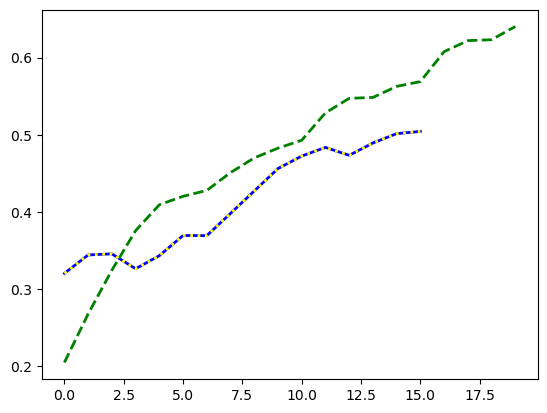